# Introduction tutorial to Deep Learning

In this excercise, you will implement a 1-layer fully connected network to map images of digits to their numerical value.
The questions appear in increasing difficulty levels.
 
A fully connected layer is essentialy similar to linear regression, where we find weights (w) that by multiplying the input will output the expected prediction.
Below is an example of one fully connected layer:
<div>
<img src="attachment:image-3.png" width="350"/>
    <div align="right">
    <i>image credit <a href=https://www.baeldung.com/cs/neural-networks-conv-fc-layers>https://www.baeldung.com/cs/neural-networks-conv-fc-layers</a></i></div>
</div>

In the image above:
- the input layer would be the feature we have in our data $(x_i)$
- the output layer represent a linear combination of the input features. each node represent a new feature we can generate from the given features.  $(y_i)$
- the edges are the weights of the linear combination. Observe that each node in the output layer is a different combintaion of the input features. (Each node is connected with some weights to all of the input's node. hence the name "fully connected").

Another way to represent this is refering to the weights as matrix W and so we get: $Y=W*X$.


You might ask yourself what makes Neural Network so speciel? One of the answer is the use of non-linear layer between linear layers. Meaning that instead of just calculating $W*X$ we calculate $f(W*X)$ where $f$ is a non-linear function. The most commonly used non-linear functions are: tanh, sigmoid, relu, etc.

The <i>"Deep learning"</i> part comes from stacking multiple linear layers with non-linear function in-between. Note that stacking only linear layers without non-linear function in between is equal to one linear layer. ($Y=W_n*...*W_1*X=W*X$).

More layers &rarr; Deeper the network &rarr; More complex feature the netwrok can learn.  


<div>
<img src="attachment:image-4.png" width="350"/>
    <div align="right">
    <i>image credit <a href=https://www.oreilly.com/library/view/tensorflow-for-deep/9781491980446/ch04.html>https://www.oreilly.com/library/view/tensorflow-for-deep/9781491980446/ch04.html</a></i></div>
</div>


<b>But</b> how do we find those weights (W)?
We use a labeled dataset to train an optimization problem where we try to minimize some loss function. The loss function will be a function of the weights and the ground truth labels.

$Loss(f_W(X), GT)$ where $X$ - input features, $f_W(X)$ - the output of the network, $GT$ - the ground truth

Usually we solve this with some gradient descent based approch, for example: SGD, Adam and more.

In this tutorial you will learn how to classify digits based on the their images with a small neural network. We will use pytorch to implement and train the model and you will be guided through all the steps of the optamization problem.

## Here are some few useful links:

* <a href=https://medium.com/@sadafsaleem5815/neural-networks-in-10mins-simply-explained-9ec2ad9ea815> Blog post on neural networks </a>

* A pytorch guide for basic model - https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html. Very similar to this tutorial. Highly recommended to go over if you struggle.

* Some short data science courses, including intro to Python and Machine learning, can be found on Kaggle

* Link to HPC\AI hub wiki: https://hpcwiki.weizmann.ac.il/en/home/ai_hub

* Link to our WEXAC Jupiter hub (you'll need a WEXAC user): https://access.wexac.weizmann.ac.il:8000/hub/login (choose the GPU option for deep learning tutorials)

* Define the aihub_env enviroment in the Jupiter hub, follow the wiki instuctions: https://hpcwiki.weizmann.ac.il/en/home/ai_hub#h-31-opening-a-jupiter-hub-session-and-setting-the-conda-environment-aihub_env 

* PyTorch, a deep learning framework which we will use for the coding exercises. For additional information, you can see the lecture from DL4CV (Deep Learning for Computer Vision) course Introduction to PyTorch 2021: https://www.youtube.com/watch?v=hQf6vvn6LGo or Pytorch getting started: https://pytorch.org/tutorials/beginner/basics/intro.html

## The Excercise
Follow the instructions in the following boxes
Lines that contain "pass" commands and variables set to "None" should be replaced by your answers

### Part 1: Imports, loading MNIST data, data loaders

In the following cell you will add the needed imports.

In [1]:
# Question 1  : Write import statements for:
#Imports:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader


In [2]:
# Question 2.1: check for cuda (GPU usage) availability
if torch.cuda.is_available():
    print("CUDA is available!")

# Question 2.2: define the device ("torch.device" class instance) used for storing training data and models
# Requirements: device type should depend on cuda availability!
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Optional: memory pinning is a technical detail related to working with GPU - recommended parameter for dataloader
#pin_memory_flag: bool = device.type == 'cuda'
pin_memory_flag = device.type == 'cuda'
#This sends the next batch to GPU from the CPU while the GPU is processing the current batch. This is done to speed up the process.


CUDA is available!


In the following cell you will load the MNIST dataset. 
* MNIST is a labeled data consisting pairs of drawn digits and their numerical value.

First, you will create a Dataset obejct using "torchvision.datasets" for training and validating. This object will hold the data for training and validating the model.

In [3]:
# Question 3.1: load the MNIST dataset using the "MNIST"
# Requirements: Create a train and validation datasets and make sure they are distinct
#               When initializing an instance of "MNIST":
#               Set the directory to which the data is downloaded to to be './root'
#               Set the "transform" argument to be the "dataset_transform" callable
#               Create training and validation sets using the "train" argument
#               Use the "dataset_transform" callable to resize all images be 16X16 pixels



dataset_transform = transforms.Compose([
    transforms.Resize((16, 16)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

#Set directory to which the data is downloaded to be './root'
root = './root'
train_dataset = MNIST(root=root, train=True, transform=dataset_transform, download=True)
test_dataset = MNIST(root=root, train=False, transform=dataset_transform, download=True)

In [4]:
# Question 3.2: Check if the data transform works:
img, label = train_dataset[0]
img.shape

torch.Size([1, 16, 16])

In the following cell you will define our model:

In [5]:
# Question 4.1: Define a linear model:
# Requirements: define a class that inherits from torch.nn.Module
#               construct a model with 1 fully connected layer
class NeuralNetwork(torch.nn.Module):
    def __init__(self, image_num_pix: int, num_classes: int):
        """
        Parameters
        ----------
        image_num_pix : number of pixels in image
        num_classes   : number of classes
        """

        # Initialize as any other torch.nn.Module
        super(NeuralNetwork, self).__init__()
        # Define attributes
        # Technical overhead: Save number of pixels to reshape images into vectors
        self.in_features = image_num_pix
        # Define the fully connected layer
        self.lyr1 = torch.nn.Linear(in_features=self.in_features, out_features=num_classes)

    def forward(self, img: torch.Tensor) -> torch.Tensor:
        # Technical overhead: Used to reshape to avoid RuntimeError when processing 2D data
        img_1 = torch.reshape(img, (img.shape[0], self.in_features))
        # Calculate forward pass using reshape image ("img_1") as input
        output = self.lyr1(img_1)
        return output


# Parameters
num_classes = 10
# Question 4.2: Construct model
image_num_pix = 16 * 16
model = NeuralNetwork(image_num_pix=image_num_pix, num_classes=num_classes)
# Question 4.3: move model to device
model = model.to(device=device)

In the following cell you will define the loss and optimizer.
The loss function defines the "distance" between the model's prediction and the ground truth. Our task it to minimize this "distance". 

The optimizer is the method in which we minimize the loss function. For example, SGD will change the weights of the model in the direction of the graidents of the loss. Such that the weights will minimize the loss.

In [6]:
# Question 5.1: define optimizer and loss
# Requirements: optimizer should be Adam, loss should be cross entropy
#               both should be callables. implementations are available in PyTorch and can be used here, like we did with "MNIST"
#               set the optimizer's learning rate to be 1e-3
optimizer = torch.optim.Adam(params=model.parameters(), lr=1e-3)
criterion = torch.nn.CrossEntropyLoss()

In the following cell you will create a DataLoader object. This object will allow you to iterate over the Dataset object you created, batch by bacth. (Because usually when training you will optimize your model one-by-one on each batch of the data.)

In [7]:
# Question 6.1: Create 2 Instances of the class mentioned in Q1.4 for loading the training and validation data in batches
# Requirements: set batch size to be 16
#               train and validation data should be shuffled during each epoch
#               set the pin_memory option to be the variable 'pin_memory_flag'
batch_size = 16
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, pin_memory=pin_memory_flag)
val_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True, pin_memory=pin_memory_flag)

In the next cell you will implement a visulizer of the network's predictions.
The function will get as an input the loader (which allows you to iterate over the data, batch by bacth using a for loop) and the model. Ofcourse we have yet to train the model so we dont expect to have correct prediction at this stage.
Below is an example:
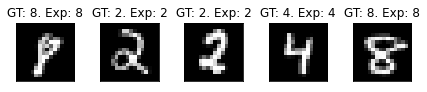

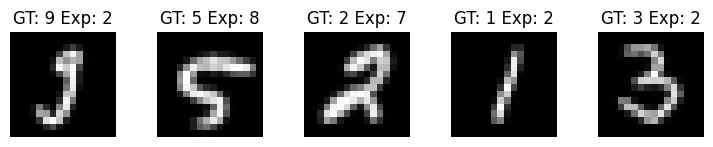

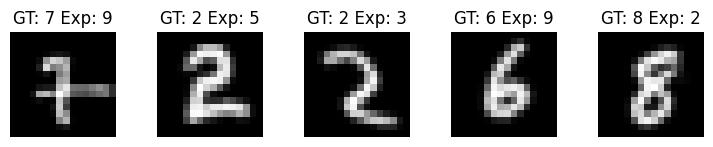

In [9]:
# Question 7.1: Plot images, ground truths and predictions, use model.forward() for model evaluation
import matplotlib.pyplot as plt

def plot_example(loader, model, device, num_imgs=5):
    for i, (imgs, labels) in enumerate(loader):
        imgs = imgs.to(device)
        labels = labels.to(device)
        outputs = model(imgs)
        _, predicted = torch.max(outputs, 1)
        fig, axes = plt.subplots(1, num_imgs, figsize=(num_imgs * 1.5, 1.5))
        for j in range(num_imgs):
            axes[j].imshow(imgs[j].cpu().numpy().squeeze(), cmap='gray')
            axes[j].set_title(f'GT: {labels[j]} Exp: {predicted[j]}')
            axes[j].axis('off')
        plt.tight_layout()
        plt.show()
        break 

plot_example(train_loader, model, device, num_imgs=5)

plot_example(val_loader, model, device, num_imgs=5)

Now we can start training the model, follow the guidence and train the model.

In [10]:
# Question 8.1: Write a training loop for 20 epochs (fill in what is missing)
#               Make sure gradients are not used during validation!
from tqdm import tqdm  # This is used for a fancy training progress bar

def train(model, train_loader, val_loader, optimizer, criterion, max_epochs=0, max_batches=5000):
  print("Start training")
  train_loss_list=[]
  val_loss_list=[]
  for epoch in tqdm(range(max_epochs)):
    print ("Epoch " + str(epoch + 1) + " out of " + str(max_epochs))
    # Train 1 Epoch
    train_loss_mean = train_one_epoch(
        model=model,
        train_loader=train_loader,
        optimizer=optimizer,
        criterion=criterion,
        max_batches=max_batches
        )
    # Add loss to list
    train_loss_list.append(train_loss_mean)
    # Validate 1 Epoch
    val_loss_mean = validate(
        model=model,
        val_loader=val_loader,
        criterion=criterion
        )
    # Add loss to list
    val_loss_list.append(val_loss_mean)
  print("End training")
  return train_loss_list, val_loss_list

def train_one_epoch(model, train_loader, optimizer, criterion, max_batches=5000):
  #  initialize average loss value
  train_loss_mean = 0
  # Loop over batches
  for batch_idx, batch in enumerate(train_loader):
    # Train 1 batch
    # organize batch to samples and tragets
    batch_imgs, batch_labels = batch
    batch_imgs, batch_labels = batch_imgs.to(device), batch_labels.to(device)
    # zero the optimizer gradients
    optimizer.zero_grad()
    # Forward pass
    model_output = model(batch_imgs)
    # Calculate train loss
    train_loss = criterion(model_output, batch_labels)
    # Back-propagation
    train_loss.backward()
    # optimizer step
    optimizer.step()
    # aggregate loss
    train_loss_mean += train_loss.item()
    # Break early if exceeded max number of batches
    if batch_idx >= max_batches:
      break
  # Normalize loss
  train_loss_mean /= (batch_idx + 1)
    # Print loss:
  print ("Train loss:", train_loss_mean)
  return train_loss_mean

def validate(model, val_loader, criterion):
  #  initialize average loss value
  val_loss_mean = 0
  # Loop over batches
  model.eval() 
  with torch.no_grad():
    for batch_idx, batch in enumerate(val_loader):
      # validate 1 batch
      # organize batch to samples and tragets
      batch_imgs, batch_labels = batch
      batch_imgs, batch_labels = batch_imgs.to(device), batch_labels.to(device)
      # Forward pass
      model_output = model(batch_imgs)
      # Calculate validation loss
      val_loss = criterion(model_output, batch_labels)
      # aggregate loss
      val_loss_mean += val_loss.item()
  # Normalize loss
  val_loss_mean /= (batch_idx + 1)
  # Print loss:
  print ("Validation loss:", val_loss_mean)
  return val_loss_mean

# Training parameters
max_epochs = 20
max_batches = 5000
# # initialize list of losses vs. epochs
train_loss_list_a = []
val_loss_list_a = []

# Train model
train_loss_list_a, val_loss_list_a = train(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    criterion=criterion,
    max_epochs=max_epochs,
    max_batches=max_batches
    )

Start training


  0%|                                                                                                                                                           | 0/20 [00:00<?, ?it/s]

Epoch 1 out of 20
Train loss: 0.4155188241004944


  5%|███████▎                                                                                                                                           | 1/20 [00:19<06:03, 19.11s/it]

Validation loss: 0.30078444330394266
Epoch 2 out of 20
Train loss: 0.3033503397094707


 10%|██████████████▋                                                                                                                                    | 2/20 [00:38<05:44, 19.14s/it]

Validation loss: 0.286092162014544
Epoch 3 out of 20
Train loss: 0.2914975765218337


 15%|██████████████████████                                                                                                                             | 3/20 [00:57<05:29, 19.39s/it]

Validation loss: 0.2724767738774419
Epoch 4 out of 20
Train loss: 0.28513443664759397


 20%|█████████████████████████████▍                                                                                                                     | 4/20 [01:17<05:11, 19.47s/it]

Validation loss: 0.2746527214318514
Epoch 5 out of 20
Train loss: 0.28172967612495026


 25%|████████████████████████████████████▊                                                                                                              | 5/20 [01:37<04:55, 19.70s/it]

Validation loss: 0.2729448670446873
Epoch 6 out of 20
Train loss: 0.2794635891440014


 30%|████████████████████████████████████████████                                                                                                       | 6/20 [01:56<04:33, 19.55s/it]

Validation loss: 0.2768809878483415
Epoch 7 out of 20
Train loss: 0.27678483158232026


 35%|███████████████████████████████████████████████████▍                                                                                               | 7/20 [02:15<04:08, 19.15s/it]

Validation loss: 0.2692097451761365
Epoch 8 out of 20
Train loss: 0.27568376603014766


 40%|██████████████████████████████████████████████████████████▊                                                                                        | 8/20 [02:33<03:46, 18.84s/it]

Validation loss: 0.2696942693307996
Epoch 9 out of 20
Train loss: 0.2745306915892909


 45%|██████████████████████████████████████████████████████████████████▏                                                                                | 9/20 [02:51<03:25, 18.72s/it]

Validation loss: 0.2681970703050494
Epoch 10 out of 20
Train loss: 0.27359650181556744


 50%|█████████████████████████████████████████████████████████████████████████                                                                         | 10/20 [03:10<03:07, 18.78s/it]

Validation loss: 0.2707238758534193
Epoch 11 out of 20
Train loss: 0.2730215895002087


 55%|████████████████████████████████████████████████████████████████████████████████▎                                                                 | 11/20 [03:30<02:50, 18.94s/it]

Validation loss: 0.27041944550275804
Epoch 12 out of 20
Train loss: 0.272893223689124


 60%|███████████████████████████████████████████████████████████████████████████████████████▌                                                          | 12/20 [03:49<02:33, 19.13s/it]

Validation loss: 0.2680795237481594
Epoch 13 out of 20
Train loss: 0.271311178637296


 65%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 13/20 [04:09<02:14, 19.23s/it]

Validation loss: 0.2708598885983229
Epoch 14 out of 20
Train loss: 0.27085920592546464


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 14/20 [04:29<01:56, 19.46s/it]

Validation loss: 0.27209616367816924
Epoch 15 out of 20
Train loss: 0.2702300173374514


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 15/20 [04:48<01:37, 19.49s/it]

Validation loss: 0.2668289233416319
Epoch 16 out of 20
Train loss: 0.2695928242102265


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 16/20 [05:08<01:18, 19.52s/it]

Validation loss: 0.2682571387052536
Epoch 17 out of 20
Train loss: 0.26949805008346833


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 17/20 [05:27<00:58, 19.45s/it]

Validation loss: 0.2665439615763724
Epoch 18 out of 20
Train loss: 0.2693505943244323


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 18/20 [05:46<00:38, 19.23s/it]

Validation loss: 0.27649839486777783
Epoch 19 out of 20
Train loss: 0.26932090081212423


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 19/20 [06:04<00:19, 19.01s/it]

Validation loss: 0.26304334719032046
Epoch 20 out of 20
Train loss: 0.26855594315131504


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [06:24<00:00, 19.21s/it]

Validation loss: 0.2744377589136362
End training


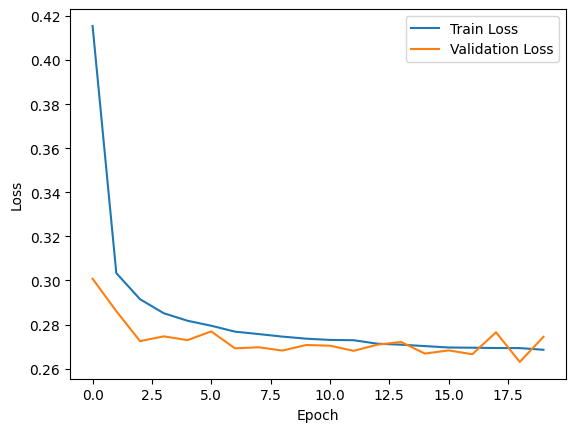

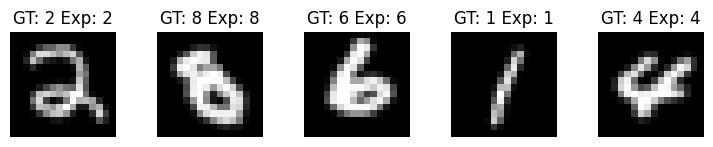

In [11]:
# Question 9.1: Plot training and validation losses
import matplotlib.pyplot as plt

def plot_losses(train_loss_list, val_loss_list):
    plt.plot(train_loss_list, label='Train Loss')
    plt.plot(val_loss_list, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_losses(train_loss_list_a, val_loss_list_a)

# Question 9.2: Use your code from question 7 to evaluate the model's performance
plot_example(val_loader, model, device, num_imgs=5)

Start training


  0%|                                                                                                                                                           | 0/20 [00:00<?, ?it/s]

Epoch 1 out of 20
Train loss: 2.306445512962341


  5%|███████▎                                                                                                                                           | 1/20 [00:20<06:37, 20.93s/it]

Validation loss: 2.3049974620819094
Epoch 2 out of 20
Train loss: 2.30644551486969


 10%|██████████████▋                                                                                                                                    | 2/20 [00:41<06:07, 20.44s/it]

Validation loss: 2.304997449493408
Epoch 3 out of 20
Train loss: 2.3064455136617026


 15%|██████████████████████                                                                                                                             | 3/20 [01:00<05:40, 20.05s/it]

Validation loss: 2.304997456741333
Epoch 4 out of 20
Train loss: 2.3064455158869426


 20%|█████████████████████████████▍                                                                                                                     | 4/20 [01:20<05:19, 19.95s/it]

Validation loss: 2.304997462844849
Epoch 5 out of 20
Train loss: 2.3064455185572306


 25%|████████████████████████████████████▊                                                                                                              | 5/20 [01:39<04:57, 19.81s/it]

Validation loss: 2.3049974609375
Epoch 6 out of 20
Train loss: 2.306445519510905


 30%|████████████████████████████████████████████                                                                                                       | 6/20 [02:00<04:42, 20.14s/it]

Validation loss: 2.30499746131897
Epoch 7 out of 20
Train loss: 2.3064455154418946


 35%|███████████████████████████████████████████████████▍                                                                                               | 7/20 [02:20<04:22, 20.16s/it]

Validation loss: 2.3049974502563475
Epoch 8 out of 20
Train loss: 2.3064455165863036


 40%|██████████████████████████████████████████████████████████▊                                                                                        | 8/20 [02:41<04:04, 20.36s/it]

Validation loss: 2.304997466659546
Epoch 9 out of 20
Train loss: 2.30644551486969


 45%|██████████████████████████████████████████████████████████████████▏                                                                                | 9/20 [03:02<03:45, 20.52s/it]

Validation loss: 2.304997457122803
Epoch 10 out of 20
Train loss: 2.306445520846049


 50%|█████████████████████████████████████████████████████████████████████████                                                                         | 10/20 [03:22<03:24, 20.41s/it]

Validation loss: 2.304997451400757
Epoch 11 out of 20
Train loss: 2.3064455128351846


 55%|████████████████████████████████████████████████████████████████████████████████▎                                                                 | 11/20 [03:42<03:02, 20.25s/it]

Validation loss: 2.3049974578857424
Epoch 12 out of 20
Train loss: 2.306445513534546


 60%|███████████████████████████████████████████████████████████████████████████████████████▌                                                          | 12/20 [04:01<02:39, 19.93s/it]

Validation loss: 2.304997452926636
Epoch 13 out of 20
Train loss: 2.306445517285665


 65%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 13/20 [04:21<02:19, 19.90s/it]

Validation loss: 2.304997458267212
Epoch 14 out of 20
Train loss: 2.30644551709493


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 14/20 [04:41<02:00, 20.01s/it]

Validation loss: 2.3049974643707274
Epoch 15 out of 20
Train loss: 2.3064455160776776


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 15/20 [05:01<01:40, 20.00s/it]

Validation loss: 2.3049974601745604
Epoch 16 out of 20
Train loss: 2.3064455142974856


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 16/20 [05:22<01:20, 20.12s/it]

Validation loss: 2.3049974586486814
Epoch 17 out of 20
Train loss: 2.306445519765218


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 17/20 [05:42<01:00, 20.26s/it]

Validation loss: 2.304997459411621
Epoch 18 out of 20
Train loss: 2.306445518620809


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 18/20 [06:03<00:40, 20.39s/it]

Validation loss: 2.3049974632263184
Epoch 19 out of 20
Train loss: 2.3064455194473266


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 19/20 [06:24<00:20, 20.45s/it]

Validation loss: 2.3049974578857424
Epoch 20 out of 20
Train loss: 2.306445516395569


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [06:44<00:00, 20.21s/it]

Validation loss: 2.3049974720001223
End training


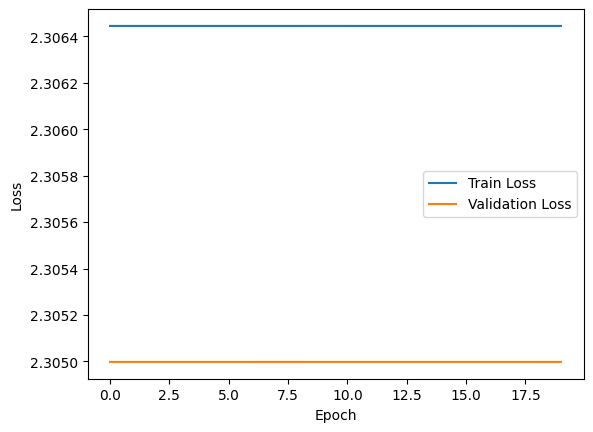

In [ ]:
# Question 10.1: Write a new class "DeeperNeuralNetwork" that has 3 linear layers with input sizes: 
# image_num_pix, image_num_pix/2, num/classes*5, with 2 ReLU activation layes and one log_softmax in the end

class DeeperNeuralNetwork(torch.nn.Module):
    def __init__(self, image_num_pix: int, num_classes: int):

        # Initialize as any other torch.nn.Module
        super(DeeperNeuralNetwork, self).__init__()

        self.in_features = image_num_pix

        # Define layers, activations and softmax:
        self.lyr1 = torch.nn.Linear(in_features=self.in_features, out_features=image_num_pix//2)
        self.lyr2 = torch.nn.Linear(in_features=image_num_pix//2, out_features=num_classes*5)
        self.lyr3 = torch.nn.Linear(in_features=num_classes*5, out_features=num_classes)
        
        self.relu = torch.nn.ReLU()  
        self.log_softmax = torch.nn.LogSoftmax(dim=1)

    def forward(self, img: torch.Tensor) -> torch.Tensor:
        # Technical overhead: Used to reshape to avoid RuntimeError when processing 2D data
        img_1 = torch.reshape(img, (img.shape[0], self.in_features))
        #Pass through layers:
        output = self.relu(self.lyr1(img_1))
        output = self.relu(self.lyr2(output))
        output = self.lyr3(output)
        output = self.log_softmax(output)

        return output

# Question 10.2: define the model, train it and plot the loss for traning and validation, and the examples.
# Use the functions that you defined before with the same parameters, use different names for the outputs.
deeper_model = DeeperNeuralNetwork(image_num_pix=image_num_pix, num_classes=num_classes)
deeper_model = deeper_model.to(device=device)

train_loss_list_b = []
val_loss_list_b = []

# Train model
train_loss_list_b, val_loss_list_b = train(
    model=deeper_model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    criterion=criterion,
    max_epochs=max_epochs,
    max_batches=max_batches
    )

plot_losses(train_loss_list_b, val_loss_list_b)

# Question 10.3: did the results improved?

# Question 10.3: did the results improved?
Compared to the one layer model, he results improved from the first epoch, but remained the same and did not improve after that. The difference between the train and validation lost is really small.

## Questions
1. What is the effect of different number of epochs? different learning rate?
   
Answer = The number of epochs is the number the times gradients are being updated according to the loss of the current training.
The learning rate determines how fast the loss the will be minimized and the model will converge on the optimal weights. High learing rate will speed up convergence but might miss the optimal weights while low learning rate will be more precise but takes more time.

2. Look at the training progression as is printed to the screen. Which is faster (in terms of iterations / second): training or validation? Why is that the case?

Answer = Validation is generally faster than training because it requires the backpropagation step, which is computationally intensive and only occurs during the training and not during the validation steps.

3. What happens to the training time if we increase the images' size? What would happen if the "device" variable was set differently?

Answer = Larger images will have higher dimensions which will lead to slower training since more data must be processed. If a GPU was not available the device would have changed to CPU and the training would have been slower. GPU can handle repetitive calculations much faster than a CPU.

4. What is the risk of performig validation without disabling gradients?

Answer = Not disabling gradients during validation consumes extra memory and processing power unnecessarily.

5. How would you measure your model robustness to noise?

Answer = Add random noise to the test data and evaluate how the model handle the noisy data

6. What are better models for the classification task given in this exercise?

Answer = Convolutional Neural Networks (CNNs) are considered the standard for image classification tasks and probably could yeild better results.